## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [44]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [45]:
df[df.group=='control'].timestamp.max(), df[df.group=='control'].timestamp.min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:15.234051')

In [46]:
df[df.group=='treatment'].timestamp.max(), df[df.group=='treatment'].timestamp.min()

('2017-01-24 13:41:44.097174', '2017-01-02 13:42:05.378582')

b. Use the cell below to find the number of rows in the dataset.

In [47]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [48]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [49]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [50]:
mismatches = df.query('(group == "treatment" & landing_page != "new_page") or (group != "treatment" & landing_page == "new_page") ')
mismatches.shape

(3893, 5)

f. Do any of the rows have missing values?

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [52]:
df2 = df[((df['group']=='treatment') == (df['landing_page']=='new_page'))==True]
df2.shape

(290585, 5)

In [53]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [54]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [55]:
adupid = df2[df2.duplicated(['user_id'])]
ind = adupid.index

c. What is the row information for the repeat **user_id**? 

In [56]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [57]:
df2.drop(ind, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [58]:
df2.shape

(290584, 5)

In [66]:
df2.groupby('group')['converted'].value_counts()

group      converted
control    0            127785
           1             17489
treatment  0            128046
           1             17264
Name: converted, dtype: int64

In [67]:
df2.groupby('group')['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [22]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df2.converted[df2['group']=='control'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
trtidx = df2.group == 'treatment'
df2.converted[trtidx].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
(df2[df2.landing_page == 'new_page'].shape[0])/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
There is hardly enough evidence to conclude the new treatment page leads to more conversion because the probabilities of conversion in the two groups (treatment and control) are very close and that the probability of the control group is even slightly higher.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

Null: the old page works as well as or better than the new page for conversion. (Pnew - Pold <= 0)
Alternative: the new page works better than the old page for conversion. (Pnew - Pold >0)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [38]:
#using the df2 dataset which is the clean version of ab_data.csv.
p_new = df2.converted.mean()
print(p_new)

0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [39]:
p_old = df2.converted.mean()
print(p_old)

0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [36]:
n_new = df2[df2.group=='treatment'].shape[0]
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [37]:
n_old = df2[df2.group=='control'].shape[0]
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [14]:
new_page_converted = np.random.choice([0,1],size=n_new,p=[1-p_new,p_new])
new_page_converted

array([0, 0, 1, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [15]:
old_page_converted = np.random.choice([0,1],size=n_old,p=[1-p_old,p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [16]:
new_page_converted.mean() - old_page_converted.mean()

0.00039695960726315871

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [40]:
p_diff = []
for _ in range(10000):
    new_pg = np.random.choice([0,1],size=n_new,p=[1-p_new,p_new])
    old_pg = np.random.choice([0,1],size=n_old,p=[1-p_old,p_old])
    p_diff.append(new_pg.mean() - old_pg.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   21.,   134.,   717.,  1987.,  3000.,  2558.,  1218.,   316.,
           44.,     5.]),
 array([-0.00456518, -0.00360161, -0.00263805, -0.00167448, -0.00071092,
         0.00025264,  0.00121621,  0.00217977,  0.00314334,  0.0041069 ,
         0.00507046]),
 <a list of 10 Patch objects>)

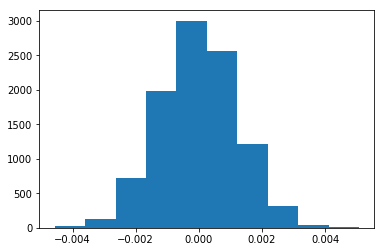

In [76]:
plt.hist(p_diff)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [41]:
actual_diff = df2.converted[df2.group=='treatment'].mean() - df2.converted[df2.group=='control'].mean()
actual_diff, (p_diff > actual_diff).mean()

(-0.0015782389853555567, 0.90380000000000005)

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
We are doing a hypothesis testing here. The null hypothesis is the old page works better than or as well as the new page in terms of conversion rate; in other words, the conversion rate difference (new page minus old) is <=0. And the alternative hypothesis is that the new page works better than the old page for conversion rate; in other words, the conversion rate difference (new page minus old) is >0.

The value we just calculated is called P-value. Here it is the probability of observing the conversion rate difference (new page minus old) >0 if the null hypothesis is true. Because this probability is higher than our alpha, 5%, which is the threshold for the percentage of Type I error we are willing to commit, we do not reject our null hypothesis and conclude that the new page is not better than the old page for conversion.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [8]:
import statsmodels.api as sm

n_old = df2[df2.landing_page=='old_page'].shape[0]
n_new = df2[df2.landing_page=='new_page'].shape[0]
convert_old = df2[(df2.landing_page=='old_page')&(df2.converted==1)].shape[0]
convert_new = df2[(df2.landing_page=='new_page')&(df2.converted==1)].shape[0]
print(n_old, n_new, convert_old, convert_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


145274 145310 17489 17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [9]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
stat, pval = proportions_ztest(count, nobs,alternative='larger')
print(stat, '{0:0.3f}'.format(pval))

-1.31092419842 0.905


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**
The z-score and the p-value means we do not have sufficient statistical evidence to reject the null hypothesis, therefore it means old pages do a job that is at least as good as the old pages do.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** Logistic Regression should be performed here.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [10]:
df2['intercept'] = 1
df2[['control','treatment']] = pd.get_dummies(df2['group'])
df2['ab_page'] = df2['treatment']
df3 = df2.loc[:,('user_id','converted','ab_page','intercept')]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [77]:
log_mod = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Jan 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:27:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Answer:**
The p-value associated with ab_page is 0.19. The null hypothesis for the p-value in the logistic regression is that ab_page has no correlation with the log odds ratio of conversion; and the alternative hypothesis is that there is an association between changes in ab_page and changes in the log odds ratio of conversion.

Note, the dependent variable in the model is the log odds ratio of conversion, log(p/(1-p)), where p is the probability of conversion. 

However, in Part II, we tested the null hypothesis that the conversion rate for the old page is at least as good as the new page. The alternative hypothesis is that conversion rate for the old page is worse than the new page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
Other aspects of a user may affect whether they are converted or not. Including other factors in the regression model can account for those facotrs.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns. Provide the statistical output as well as a written response to answer this question.

In [11]:
dfc = pd.read_csv('countries.csv')
dfc[['CA','UK','US']] = pd.get_dummies(dfc['country'])
dfc.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


Let's recall what our dataset looks like:

In [12]:
df3.head()

,user_id,converted,ab_page,intercept
0,851104,0,0,1
1,804228,0,0,1
2,661590,0,1,1
3,853541,0,1,1
4,864975,1,0,1


Now let's combine our two datasets together using user_id as our key.

In [13]:
df4 = df3.join(dfc,rsuffix='_country')
df4.head()

,user_id,converted,ab_page,intercept,user_id_country,country,CA,UK,US
0,851104,0,0,1,834778.0,UK,0.0,1.0,0.0
1,804228,0,0,1,928468.0,US,0.0,0.0,1.0
2,661590,0,1,1,822059.0,UK,0.0,1.0,0.0
3,853541,0,1,1,711597.0,UK,0.0,1.0,0.0
4,864975,1,0,1,710616.0,UK,0.0,1.0,0.0


We are also going to check if any user_id do not have any country info. If so, we are going to delete those records with missing country data.

In [14]:
df4.info()
df5 = df4[(df4.country.isnull()==False)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 9 columns):
user_id            290584 non-null int64
converted          290584 non-null int64
ab_page            290584 non-null uint8
intercept          290584 non-null int64
user_id_country    286742 non-null float64
country            286742 non-null object
CA                 286742 non-null float64
UK                 286742 non-null float64
US                 286742 non-null float64
dtypes: float64(4), int64(3), object(1), uint8(1)
memory usage: 30.2+ MB


Our cleaned data set with no missing data has 286,742 users. 

In [63]:
df5.shape[0]

286742

Initiate the logistic model and add country, represented by two columns, into it.

In [64]:
log_mod2 = sm.Logit(df5['converted'],df5[['intercept','ab_page','CA','UK']])

In [65]:
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286738
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Jan 2020   Pseudo R-squ.:               1.523e-05
Time:                        22:48:45   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
                                        LLR p-value:                    0.3620
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9884      0.009   -222.149      0.000      -2.006      -1.971
ab_page       -0.0158      0.012     -1.376      0.169      -0.038       0.007
CA            -0.0260      0.027     -0.968      0.333      -0.079       0.027
UK             0.0062      0.013      0.465      0.642      -0.020       0.032
==============================================================================
"""

**Conclusion**
Based on the model results, changes in ab_page or country statistically are not significantly associated with conversion in the logistic regression model, with significance level of 0.05. This means whichever country is from, and whether the user is shown the old or new page both are not associated with their final conversion rate. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

We first create the interaction terms.

In [18]:
df6 = df5[['user_id','converted','ab_page','intercept','CA','UK']]
df6['ab_page'] = np.int8(df6['ab_page'])
df6['ab_page_CA'] = df6['ab_page']*df6['CA']
df6['ab_page_UK'] = df6['ab_page']*df6['UK']
df6.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,user_id,converted,ab_page,intercept,CA,UK,ab_page_CA,ab_page_UK
0,851104,0,0,1,0.0,1.0,0.0,0.0
1,804228,0,0,1,0.0,0.0,0.0,0.0
2,661590,0,1,1,0.0,1.0,0.0,1.0
3,853541,0,1,1,0.0,1.0,0.0,1.0
4,864975,1,0,1,0.0,1.0,0.0,0.0


Now we fit the logistic regression model with the data, including the interactions.

In [19]:
log_mod3 = sm.Logit(df6['converted'],df6[['intercept','ab_page','CA','UK','ab_page_CA','ab_page_UK']])
results3 = log_mod3.fit()
results3.summary()


Optimization terminated successfully.
         Current function value: 0.366150
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286736
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Jan 2020   Pseudo R-squ.:               2.708e-05
Time:                        00:32:35   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
                                        LLR p-value:                    0.3379
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9849      0.010   -204.831      0.000      -2.004      -1.966
ab_page       -0.0229      0.014     -1.667      0.096      -0.050       0.004
CA            -0.0684      0.039     -1.776      0.076      -0.144       0.007
UK             0.0003      0.019      0.017      0.986      -0.037       0.037
ab_page_CA     0.0839      0.054      1.558      0.119      -0.022       0.189
ab_page_UK     0.0119      0.027      0.444      0.657      -0.041       0.064
==============================================================================
"""

Conclusion: based on the model result summary, none of these variables are significantly associated with conversion rate because the p-values are all greater than 0.05. There is not enought statistical evidence to say counry and ab_page are associated with conversion rate.

For the cost of implementing the new page and lack of evidence to prove that the new page works better than the old page for conversion rate, it is recommended to keep the old page, unless other variables are identified to have an interaction with being shown the new or old page, and that interaction is significantly associated with the conversion rate.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!




## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])